## EDA & Cleaning: Exploring continuous features

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**This section focuses on exploring the `Pclass`, `Age`, `SibSp`, `Parch`, and `Fare` features.**

In [90]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [91]:
titanic = pd.read_csv('./titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
#Drop Categotrical Features
cat_feat = ['PassengerId','Name','Sex','Ticket','Cabin','Embarked']

In [93]:
#Storing Continuos Features
Tn_cont = titanic.drop(cat_feat, axis = 1, inplace = False)
Tn_cont.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


### From Below we Noticed Age has Missing values 

In [94]:
Tn_cont.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Fare Seems Good for Analysis of Survival

In [95]:
Tn_cont.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


### Fill missing for `Age`

In [96]:
Tn_cont.groupby(Tn_cont['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [97]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [98]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
Tn_cont['Age'] = titanic['Age']

In [100]:
Tn_cont.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,1,3,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,0,3,35.000000,0,0,8.0500
5,0,3,29.699118,0,0,8.4583
6,0,1,54.000000,0,0,51.8625
7,0,3,2.000000,3,1,21.0750
8,1,3,27.000000,0,2,11.1333
9,1,2,14.000000,1,0,30.0708


### Plot continuous features

C:\Users\amans\AppData\Local\Temp\ipykernel_9484\3408372401.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
C:\Users\amans\AppData\Local\Temp\ipykernel_9484\3408372401.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survived,

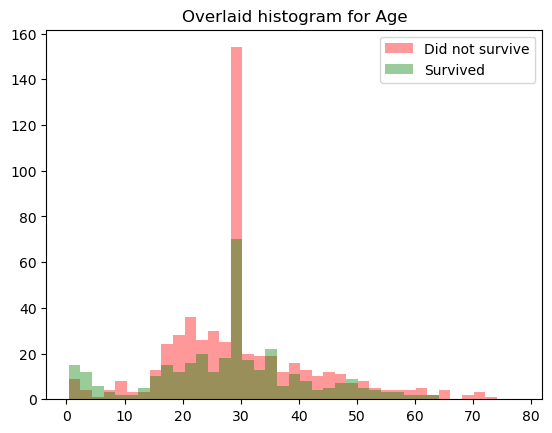

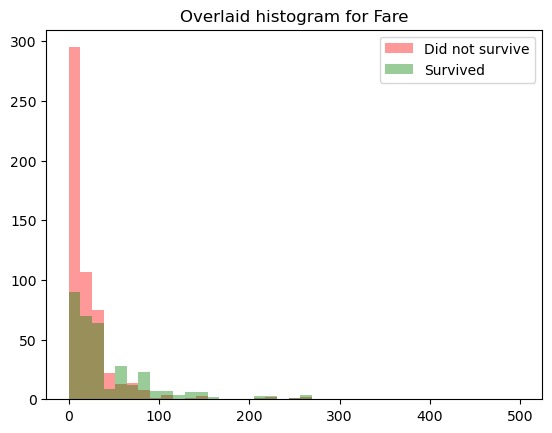

In [101]:
for i in ['Age','Fare']:
    died = list(Tn_cont[Tn_cont['Survived'] == 0][i].dropna())       ## Derive age and Fare who died
    survived = list(titanic[titanic['Survived'] == 1][i].dropna())   ## Derive age and Fare who Survived
    xmin = min(min(died),min(survived))                              ## Most min in both
    xmax = max(max(died),max(survived))                              ## Most max in both
    width = (xmax - xmin)/40
    sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Did not survive', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

<Figure size 640x480 with 0 Axes>

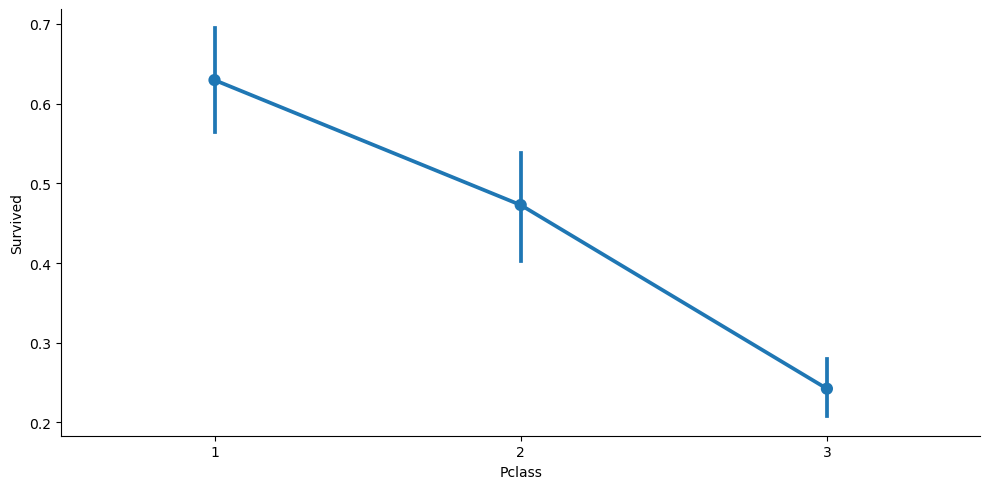

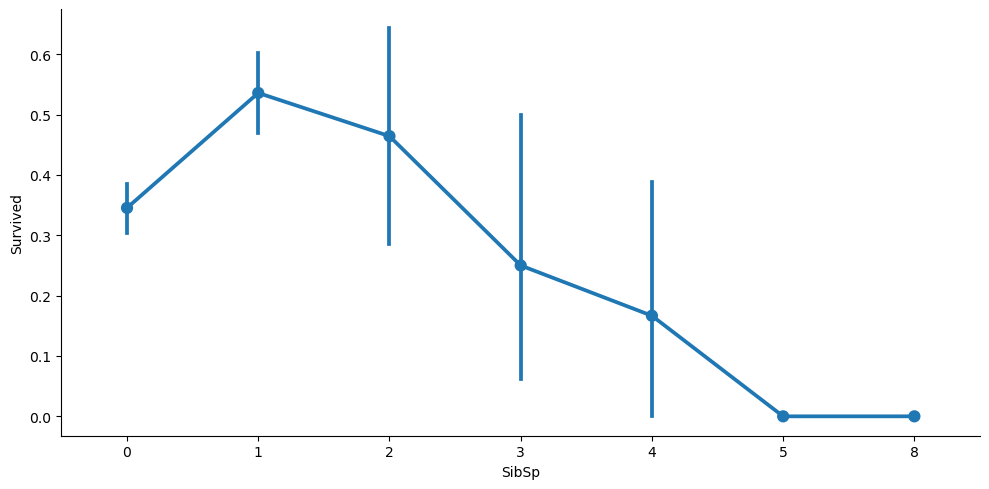

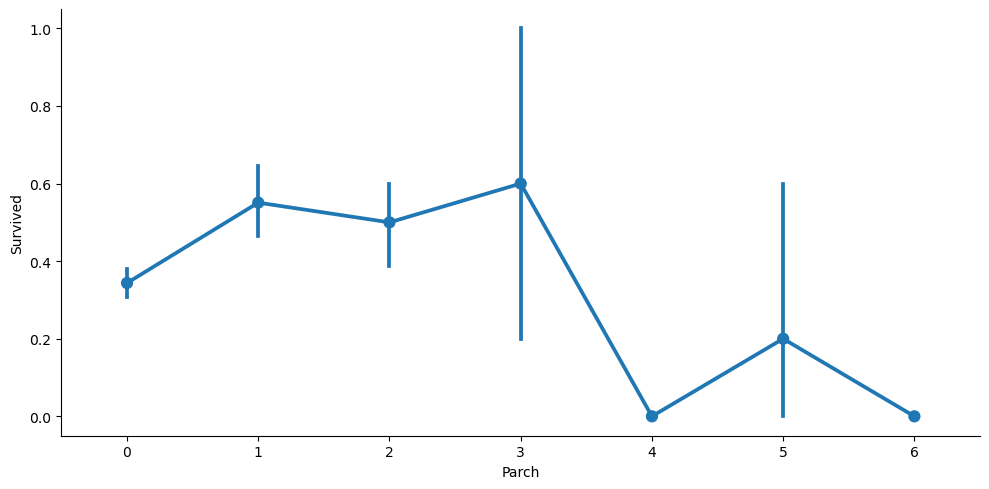

In [102]:
for i, col in enumerate(['Pclass', 'SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2,)

### Since Parch and SibSp are similar, So we Combine the two

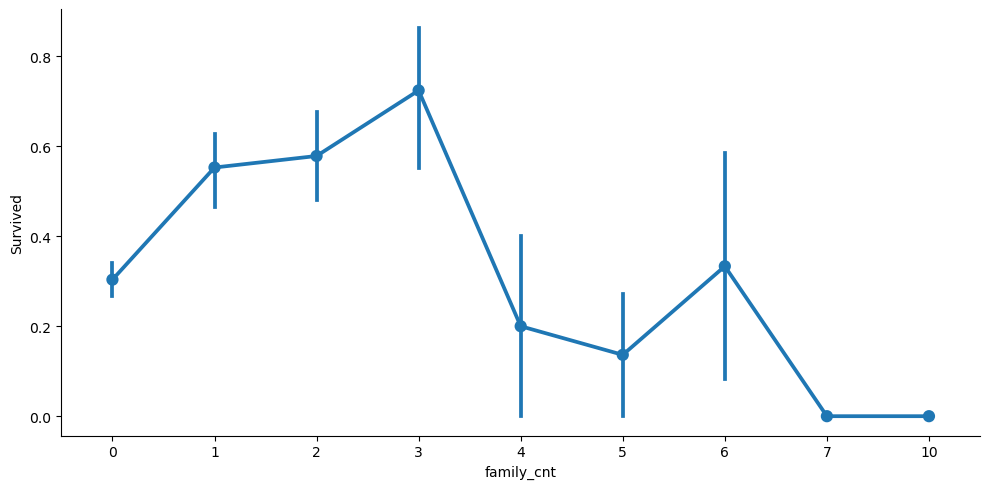

In [103]:
Tn_cont['family_cnt'] = Tn_cont['SibSp'] + Tn_cont['Parch']
sns.catplot(x='family_cnt', y='Survived', data=Tn_cont, kind='point', aspect=2,)

In [104]:
Tn_cont.drop(['SibSp','Parch'], axis = 1, inplace=True)

In [105]:
Tn_cont.head()

,Survived,Pclass,Age,Fare,family_cnt
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,1
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,1
4,0,3,35.0,8.0500,0


### Now Exploring categorical features

In [106]:
# Drop all continuous features
cont_feat = ['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare']
Tn_cat = titanic.drop(cont_feat, axis=1, inplace=False)
Tn_cat.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


In [107]:
Tn_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


### By looking info we noticed Cabin has a lot of missing values let us check its importance to survival

In [108]:
Tn_cat.groupby(Tn_cat['Cabin'].isnull()).mean() ## only 'Survived has Numerical Values'

,Survived
Cabin,
False,0.666667
True,0.299854


### Clearly People having cabin has more Survival rate, So we can't drop this Column

## Change Cabins data to 0 or 1

In [109]:
Tn_cat['Cabin_ind'] = np.where(Tn_cat['Cabin'].isnull(), 0, 1)
Tn_cat.head(10)

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_ind
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0
5,0,male,330877,NaN,Q,0
6,0,male,17463,E46,S,1
7,0,male,349909,NaN,S,0
8,1,female,347742,NaN,S,0
9,1,female,237736,NaN,C,0


### Plot Categorical Features

<Figure size 640x480 with 0 Axes>

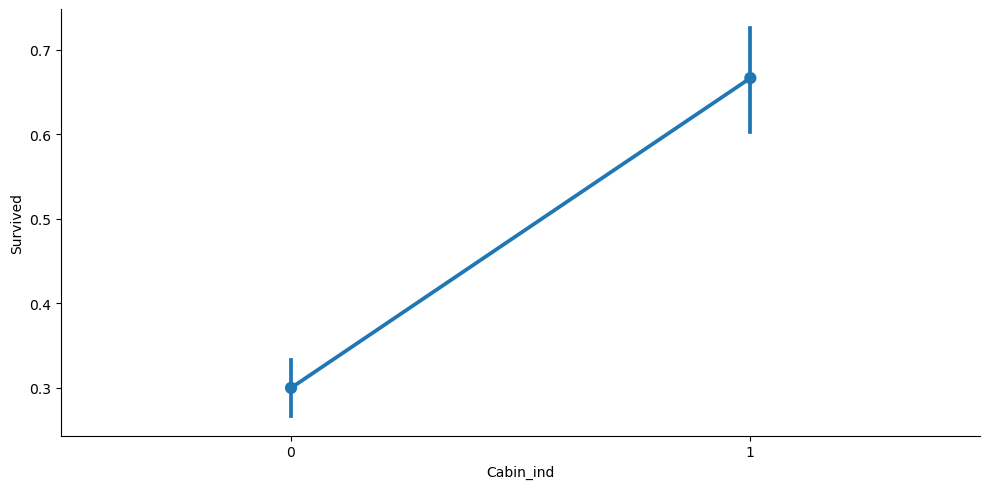

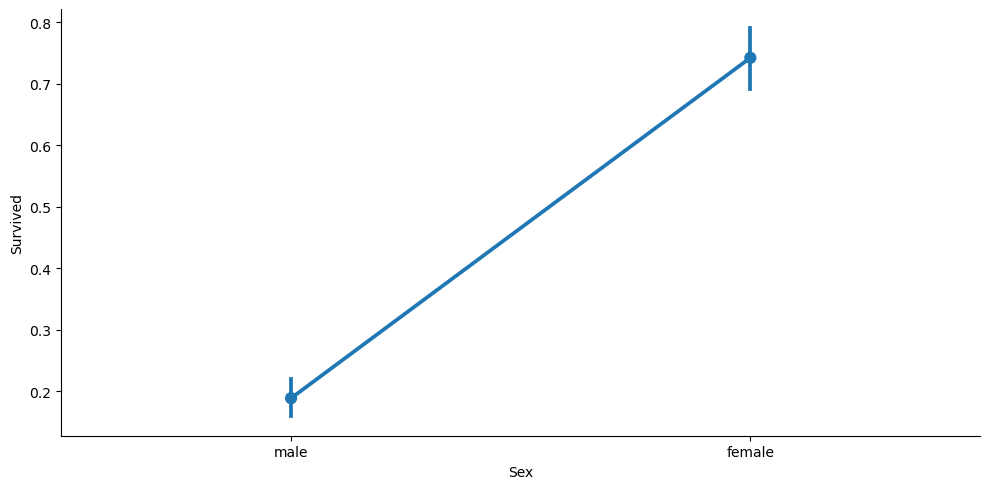

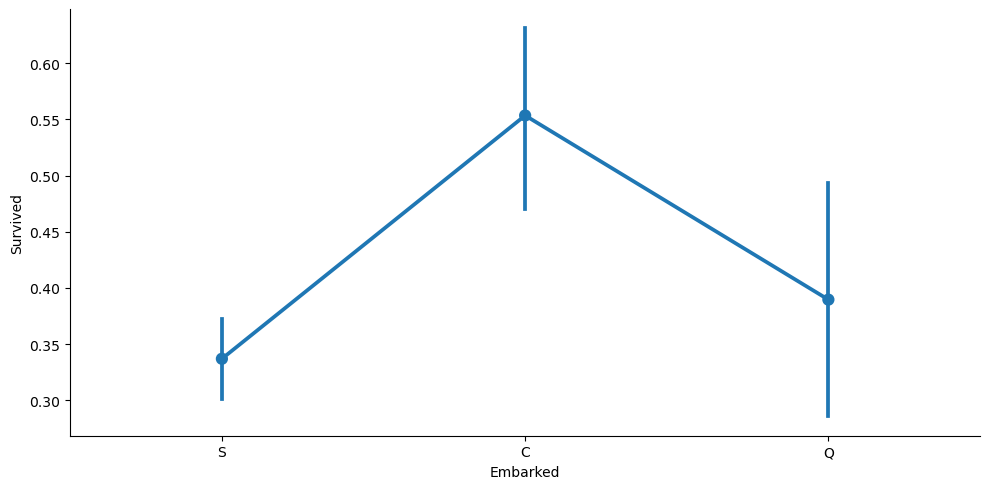

In [110]:
for i, col in enumerate(['Cabin_ind', 'Sex', 'Embarked']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=Tn_cat, kind='point', aspect=2, )

In [111]:
Tn_cat.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [112]:
Tn_cat.pivot_table('Survived', index='Cabin_ind', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129


### We drop Cabin,Ticket and Embarked

In [113]:
Tn_cat.drop(['Cabin', 'Ticket','Embarked'], axis=1, inplace=True)
Tn_cat.head()

,Survived,Sex,Cabin_ind
0,0,male,0
1,1,female,1
2,1,female,0
3,1,female,1
4,0,male,0


### Convert `Sex` to numeric

In [114]:
gender_num = {'male': 0, 'female': 1}

Tn_cat['Sex'] = Tn_cat['Sex'].map(gender_num)
Tn_cat.head()

,Survived,Sex,Cabin_ind
0,0,0,0
1,1,1,1
2,1,1,0
3,1,1,1
4,0,0,0


### Now that we understood, our dataset let us finally update our final dataset.

In [115]:
Titanic = Tn_cont.copy()
Titanic['Sex'] = Tn_cat['Sex']
Titanic['Cabin_ind'] = Tn_cat['Cabin_ind']

In [116]:
Titanic.head(10)

,Survived,Pclass,Age,Fare,family_cnt,Sex,Cabin_ind
0,0,3,22.000000,7.2500,1,0,0
1,1,1,38.000000,71.2833,1,1,1
2,1,3,26.000000,7.9250,0,1,0
3,1,1,35.000000,53.1000,1,1,1
4,0,3,35.000000,8.0500,0,0,0
5,0,3,29.699118,8.4583,0,0,0
6,0,1,54.000000,51.8625,0,0,1
7,0,3,2.000000,21.0750,4,0,0
8,1,3,27.000000,11.1333,2,1,0
9,1,2,14.000000,30.0708,1,1,0


In [117]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   family_cnt  891 non-null    int64  
 5   Sex         891 non-null    int64  
 6   Cabin_ind   891 non-null    int32  
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [118]:
Titanic.to_csv('Titanic_cleaned.csv',index=False)

# Spliting Data into Training, Validation and Testing Data

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
features = Titanic.drop('Survived',axis=1)
labels = Titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.4, random_state = 42) # features -> X_train X_test, labels -> y_train y_test
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state = 42) # splitting above test set into validation and testing data

In [121]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


## Now we use Cross-Validation first over our training data and use RandomForest model

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [127]:
rf = RandomForestClassifier()

scores = cross_val_score(rf, X_train, y_train.values.ravel(), cv=5)  # .values.ravel() is used to pass labels as array which prevents the warning

In [128]:
scores

array([0.81308411, 0.8317757 , 0.79439252, 0.79439252, 0.82075472])

In [132]:
Avg = sum(scores)/5
print('Average Accuracy is:',Avg)

Average Accuracy is: 0.8108799153588432


# We will do Hyperparameter Tuning

In [133]:
from sklearn.model_selection import GridSearchCV

In [135]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))    ##defining a function to print our hyperparameter's result

In [137]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],                  ## How many individual Decision tree to use
    'max_depth': [2, 10, 20, None]                 ## Maximum depth of the Decision tree
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 10, 'n_estimators': 100}

0.757 (+/-0.109) for {'max_depth': 2, 'n_estimators': 5}
0.787 (+/-0.114) for {'max_depth': 2, 'n_estimators': 50}
0.803 (+/-0.107) for {'max_depth': 2, 'n_estimators': 100}
0.809 (+/-0.075) for {'max_depth': 10, 'n_estimators': 5}
0.82 (+/-0.066) for {'max_depth': 10, 'n_estimators': 50}
0.822 (+/-0.051) for {'max_depth': 10, 'n_estimators': 100}
0.79 (+/-0.044) for {'max_depth': 20, 'n_estimators': 5}
0.811 (+/-0.034) for {'max_depth': 20, 'n_estimators': 50}
0.815 (+/-0.027) for {'max_depth': 20, 'n_estimators': 100}
0.803 (+/-0.016) for {'max_depth': None, 'n_estimators': 5}
0.809 (+/-0.034) for {'max_depth': None, 'n_estimators': 50}
0.809 (+/-0.028) for {'max_depth': None, 'n_estimators': 100}


## We chose top 3 best
#### 1: 'max_depth': 10, 'n_estimators': 100  @0.822
#### 2: 'max_depth': 10, 'n_estimators': 50   @0.82
#### 3: 'max_depth': 20, 'n_estimators': 100  @0.815

### Fit best models on full training set

In [140]:
rf1 = RandomForestClassifier(n_estimators=100, max_depth=10)
rf1.fit(X_train, y_train.values.ravel())

rf2 = RandomForestClassifier(n_estimators=50, max_depth=10)
rf2.fit(X_train, y_train.values.ravel())

rf3 = RandomForestClassifier(n_estimators=100, max_depth=20)
rf3.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=20)

## Evaluating metric over Validation data

In [143]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [144]:
for mdl in [rf1, rf2, rf3]:
    y_pred = mdl.predict(X_val)
    accuracy = round(accuracy_score(y_val, y_pred), 3)
    precision = round(precision_score(y_val, y_pred), 3)
    recall = round(recall_score(y_val, y_pred), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,mdl.n_estimators,accuracy,precision,recall))

MAX DEPTH: 10 / # OF EST: 100 -- A: 0.821 / P: 0.844 / R: 0.711
MAX DEPTH: 10 / # OF EST: 50 -- A: 0.844 / P: 0.875 / R: 0.737
MAX DEPTH: 20 / # OF EST: 100 -- A: 0.832 / P: 0.838 / R: 0.75


In [147]:
#Final Evaluation over Test Data

In [148]:
y_pred = rf2.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)
print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(rf2.max_depth,rf2.n_estimators,accuracy,precision,recall))

MAX DEPTH: 10 / # OF EST: 50 -- A: 0.815 / P: 0.786 / R: 0.677


In [149]:
from sklearn import metrics

In [151]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[101,  12],
       [ 21,  44]], dtype=int64)